Since EAZY has their own set of kcorrect templates and links to HSC filters, I compare these with the one we use in SkyPy in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

## K-Correct Templates

In [2]:
path_templates = '/Users/philipp/Documents/PhD/lum_func_measurement/templates/'
n_templates = 5
kcorrect_skypy = pyfits.open(path_templates + 'k_nmf_derived.default.fits')
seds_skypy = kcorrect_skypy[1].data
wave_skypy = kcorrect_skypy[11].data
eazy = np.loadtxt(path_templates + 'BR07/default_sed1_ext.dat')
seds_eazy = np.zeros((5,len(eazy)))
wave_eazy = np.zeros((5,len(eazy)))
for i in range(n_templates):
    eazy = np.loadtxt(path_templates + f'BR07/default_sed{i+1}_ext.dat')
    seds_eazy[i] = eazy[:,1]
    wave_eazy[i] = eazy[:,0]

In [3]:
print(max(seds_eazy[0]))
print(max(seds_skypy[0]))

print(max(wave_eazy[0]))
print(max(wave_skypy))

1.69323e-11
1.6932282e-11
3198630.0
3198626.2


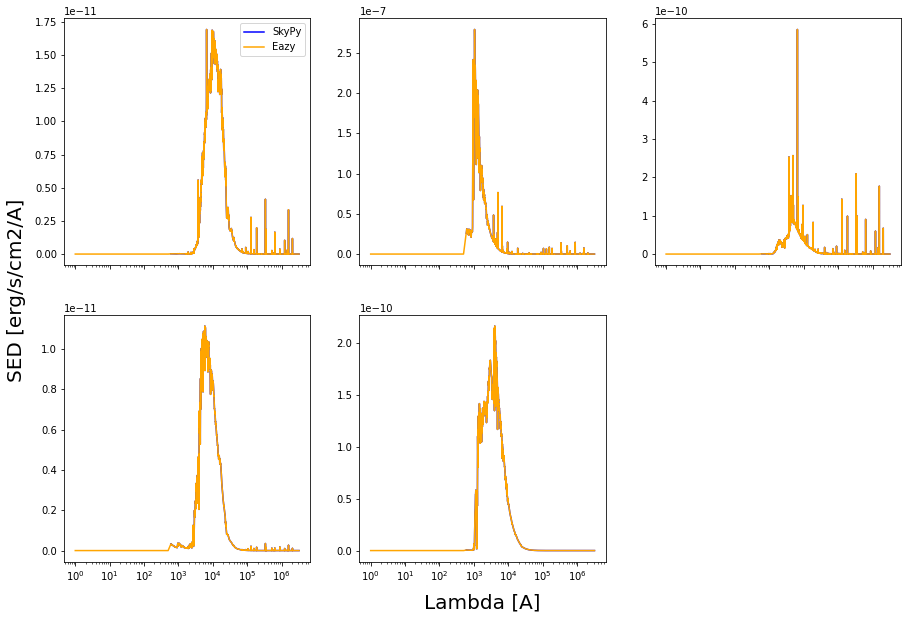

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=False, constrained_layout=False)

for ax in axes.flat:
    ax.axis('off')
for ax, i in zip(axes.flat, range(n_templates)):
    ax.axis('on')
    ax.plot(wave_skypy, seds_skypy[i], label='SkyPy', c='b')
    ax.plot(wave_eazy[i], seds_eazy[i], label='Eazy', c='orange')
    ax.set_xscale('log')
    if i == 0:
        ax.legend()
    
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False,
                left=False, right=False)
ax.set_ylabel('SED [erg/s/cm2/A]', labelpad=15, fontsize=20)
ax.set_xlabel('Lambda [A]', labelpad=15, fontsize=20)
# plt.subplots_adjust(wspace=0.12, hspace=0.33)
plt.show()


## HSC Filters

In [46]:
import speclite.filters

In [74]:
hsc_speclite = speclite.filters.load_filters('hsc2017-*')
hsc_speclite.effective_wavelengths

<Quantity [4843.70024525, 6258.89408287, 7730.08550738, 8912.3901474 ,
           9786.94762896] Angstrom>

In [65]:
path = '/Users/philipp/Documents/PhD/lum_func_measurement/Examples/Filters/'
hsc_filters = ['HSC_g', 'HSC_r','HSC_i', 'HSC_z', 'HSC_Y']
filter_eazy = np.loadtxt(path+hsc_filters[0]+'.txt')
filter_eazy[:,0]
# speclite.filters.load_filter(hsc_speclite.names[0]).response

array([3500., 3510., 3520., 3530., 3540., 3550., 3560., 3570., 3580.,
       3590., 3600., 3610., 3620., 3630., 3640., 3650., 3660., 3670.,
       3680., 3690., 3700., 3710., 3720., 3730., 3740., 3750., 3760.,
       3770., 3780., 3790., 3800., 3810., 3820., 3830., 3840., 3850.,
       3860., 3870., 3880., 3890., 3900., 3910., 3920., 3930., 3940.,
       3950., 3960., 3970., 3980., 3990., 4000., 4010., 4020., 4030.,
       4040., 4050., 4060., 4070., 4080., 4090., 4100., 4110., 4120.,
       4130., 4140., 4150., 4160., 4170., 4180., 4190., 4200., 4210.,
       4220., 4230., 4240., 4250., 4260., 4270., 4280., 4290., 4300.,
       4310., 4320., 4330., 4340., 4350., 4360., 4370., 4380., 4390.,
       4400., 4410., 4420., 4430., 4440., 4450., 4460., 4470., 4480.,
       4490., 4500., 4510., 4520., 4530., 4540., 4550., 4560., 4570.,
       4580., 4590., 4600., 4610., 4620., 4630., 4640., 4650., 4660.,
       4670., 4680., 4690., 4700., 4710., 4720., 4730., 4740., 4750.,
       4760., 4770.,

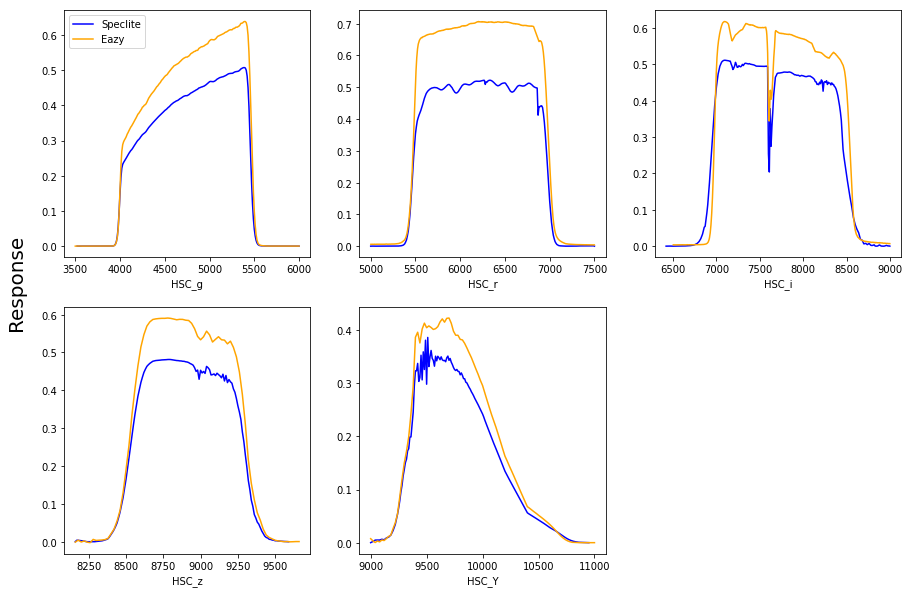

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False, constrained_layout=False)

for ax in axes.flat:
    ax.axis('off')
for ax, (i,filter_speclite) in zip(axes.flat, enumerate(hsc_speclite.names)):
    ax.axis('on')
    filt = speclite.filters.load_filter(filter_speclite)
    filter_eazy = np.loadtxt(path+hsc_filters[i]+'.txt')
    ax.plot(filt.wavelength, filt.response, label='Speclite', c='b')
    ax.plot(filter_eazy[:,0], filter_eazy[:,1], label='Eazy', c='orange')
    ax.set_xlabel(hsc_filters[i])
    if i == 0:
        ax.legend()
    
ax = fig.add_subplot(111, frameon=False)
ax.tick_params(labelcolor='none', top=False, bottom=False,
                left=False, right=False)
ax.set_ylabel('Response', labelpad=15, fontsize=20)
# plt.subplots_adjust(wspace=0.12, hspace=0.33)
plt.show()